# Lab 3: Gesture Recognition using Convolutional Neural Networks

**Deadlines**: 

- Lab 3 Part A: Oct 15, 11:59pm
- Lab 3 Part B: Oct 22, 11:59pm

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TAs**: 
- Lab 3 Part A: Geoff Donoghue  
- Lab 3 Part B: Geoff Donoghue

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins. 

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/1WviANHon4jAkWmAM70WbiWhUhCdBOlOO/view?usp=sharing

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

In [ ]:
# Import the required libraries and modules
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import string
import matplotlib.pyplot as plt
import os

working_dir = '/content/gdrive/My Drive/Colab Notebooks/APS360/Labs/Lab3'

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
) 

In [ ]:
# Since images are saved on Google Drive, need to mount gdrive and unzip the 
# provided dataset into the /root/ folder
from google.colab import drive
drive.mount('/content/gdrive')

!unzip '/content/gdrive/My Drive/Colab Notebooks/APS360/Labs/Lab3/gesture_dataset.zip' -d '/root/gesture_dataset'


**ANSWER:**

The function `load_data` below loads data given a path and a flag that indicates whether the data is being used for training or debugging. If it being used for training, three datasets that have been pre-split is loaded into training, validation and testing datasets. The split was done as follows: 70% of the total images are part of the training set, 15% is part of the validation dataset and 15% is part of the testing dataset. This results in 2098 training images (all from the provided gesture dataset), 378 validation images (all from the provided gesture dataset) and 378 testing images (combination of images from the provided gesture dataset and the dataset that was submitted for Lab 3 Part A). If the data is being loaded for debugging, all of the data is returned in a single training dataset. The set of hand gestures that was submitted for Lab 3 Part A is also loaded in as the debug dataset later in this lab.

The decision behind the 70%-15%-15% split of the entire dataset had multiple reasons:
* Since the test dataset is required to contain hands that were never seen before, it made sense to include my own. However, since 27 samples are not a diverse enough representation of the real world, I decided to include some of the hands from the provided dataset as well.
* The 70% split stems from the fact that a bulk of the data used during training should make up the training dataset so that the network is able to learn the model parameters adequately. A large dataset also protects against issues such as overfitting.
* We also cannot use a validation set that is too small as it will not be representative of real-world data and the model performance will be skewed i.e. if the majority of the validation dataset consists of classes that the model finds difficult to classify, the perceived performance of the model will be much poorer, and vice-versa.

In [ ]:
def load_data(batch_size=64, root='/root/gesture_dataset/gesture_dataset', debug=False, num_workers=1):
  
  # Load the data into a list of tuples containing the following information:
  # (torch.Tensor([3, 224, 224]), class_number)
  all_transforms = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(224),
                                                  torchvision.transforms.ToTensor()])
  
  # Debug Mode
  if debug == True:
    train_dataset = torchvision.datasets.ImageFolder(root=working_dir+'/Submission_Data/', 
                                                     transform=all_transforms)
    train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               num_workers=num_workers,
                                               shuffle=True)
    return train_loader 

  # Default Training Mode
  train_dataset = torchvision.datasets.ImageFolder(root=root+'/train_dataset/', 
                                                   transform=all_transforms)
  val_dataset = torchvision.datasets.ImageFolder(root=root+'/val_dataset/', 
                                                 transform=all_transforms)
  test_dataset = torchvision.datasets.ImageFolder(root=root+'/test_dataset/', 
                                                  transform=all_transforms)

  # Step 1: Shuffle the images to ensure more even distribution of all classes
  # in both training and validation sets. Set seed for reproducibility.
  
  train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size,
                                             num_workers=num_workers,
                                             shuffle=True) 
    
  val_loader = torch.utils.data.DataLoader(val_dataset,
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           shuffle=True) 
  
  test_loader = torch.utils.data.DataLoader(test_dataset, 
                                            batch_size=batch_size, 
                                            num_workers=num_workers, 
                                            shuffle=True)
  return train_loader, val_loader, test_loader

In [ ]:
train_loader, val_loader, test_loader = load_data()
debug_data_loader = load_data(root=working_dir+'/Submission_Data/', debug=True)

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

**ANSWER:**

*Neural Network Architecture*

The neural network consists of a mix of convolutional and fully-connected layers. There are three alternating convolution and max-pooling layers followed by a fully-connected, two-layer MLP resulting in a total of eight layers. 

<br> *Hyperparameter Choices*

The activation function used after each convolution and fully-connected layer is the ReLU - this was chosen arbitrarily, more out of habit than anything, and since part (c) showed that the architecture had the capacity to solve this classification problem, it was not modified. This was also the case for using Max Pool as the pooling function.

The number of channels (both input and output), kernel size, stride and padding were chosen in an effort to maintain the dimensions of the input data. In fact, the only reduction in dimensionality occurs as a result of the pooling layers. This was done in an effort to preserve as much spatial information as possible before consolidation.

The number of hidden units in the fully-connected MLP was arbitrarily chosen to be a number between 28\*28\*12 and 9. 


In [ ]:
class GestureClassifier(nn.Module):
  def __init__(self):
    super(GestureClassifier, self).__init__()
    self.conv1 = nn.Conv2d(3, 5, 5, 1, 2)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(5, 10, 3, 1, 1)
    #self.conv3 = nn.Conv2d(8, 12, 3, 1, 1)
    self.fc1 = nn.Linear(56*56*10, 1000)
    self.fc2 = nn.Linear(1000, 30)
    self.fc3 = nn.Linear(30, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    #x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 56*56*10)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

**ANSWER:**

In [ ]:
# This is a helper function to calculate the accuracy of a model's predictions 
# on a given dataset.

def get_accuracy(model, loader):
    # Set up counters to track the number of correct and total predictions
    correct = 0
    total = 0

    # Iterate through the batch of data to get the model predictions and compare 
    # to the ground labels
    for imgs, labels in iter(loader):
      
      # Enable GPU usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()       
  
      # Generate the probabilities of being in a specific class for each image
      output = model(imgs)
        
      # Select the index with maximum probability to make the prediction
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    
    # Determine the accuracy achieved
    return correct / total

*Loss Function and Optimizer Choice*

I have opted to use Cross Entropy as my loss function as it is commonly used for architectures created to solve classification problems. I am also using the Adam Optimizer mainly for its performance features - the ability to convergence rapidly while requiring a minimal amount of tuning when compared to other optimizers that we have seen before.

In [ ]:
# This is the training function used to train a neural network given the learning
# rate, batch size, number of epochs and debug/default mode.

def train(model, learning_rate, batch_size, num_epochs, debug=False):
    # Set up a random seed such that results can be reproduced
    torch.manual_seed(1000)

    # Determine the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Set up lists to hold the training loss and training/validation accuracy
    # and a count to hold the number of training iterations executed
    iters, losses, train_acc, val_acc = [], [], [], []
    count = 0
    
    # Debug or Default Mode
    if debug == True:
      tloader = debug_data_loader
    else:
      tloader = train_loader
      vloader = val_loader

    # Train model for the specified number of epochs using batches of data
    for epoch in range(num_epochs):
        
        mini_batch = 0
        mini_batch_correct = 0
        mini_batch_total = 0

        for imgs, labels in iter(tloader):
          # Enable GPU usage
          if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

          # Training        
          out = model(imgs)             # Forward pass
          loss = criterion(out, labels) # Compute the total loss
          loss.backward()               # Backward pass (compute parameter updates)
          optimizer.step()              # Make the updates for each parameter
          optimizer.zero_grad()         # Clean up for next iteration

          # Compute accuracy of the mini-batch
          pred = out.max(1, keepdim=True)[1]
          mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
          mini_batch_total = imgs.shape[0]
          train_acc.append((mini_batch_correct / mini_batch_total))

          # Save the current training information
          iters.append(count)
          losses.append(float(loss)/batch_size)           # Compute average loss
          if debug == False:
            val_acc.append(get_accuracy(model, vloader))  # Compute validation accuracy
            
          mini_batch += 1
          count += 1

    # Checkpoint model
    model_path = working_dir + "/Model_Checkpoints/gc_bs{}_lr{}_epoch{}".format(batch_size, learning_rate, epoch)
    torch.save(model.state_dict(), model_path)

    # Plot the learning curves for accuracy and loss
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    if debug == False:
      plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    if debug == False:
      print("Final Validation Accuracy: {}".format(val_acc[-1]))

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

**ANSWER:**

In [ ]:
# Enable GPU usage
use_cuda = True

# Select neural network and dataset to overfit
debug_model = GestureClassifier()
debug_data_root = working_dir + '/Submission_Data/'

# GPU usage debug message
if use_cuda and torch.cuda.is_available():
  debug_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


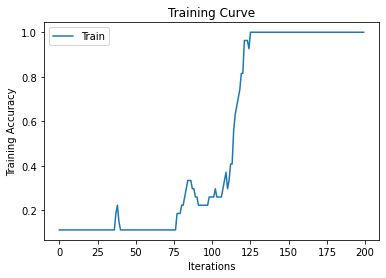

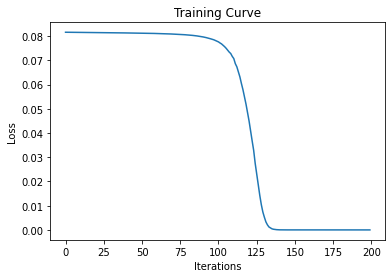

Final Training Accuracy: 1.0


In [ ]:
# "Overfit" model to chosen dataset
train(debug_model, learning_rate=0.01, batch_size=27, num_epochs=200, debug=True)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

**ANSWER:**

* number of convolutional layers
* kernel sizes for each convolutional layer
* number of output channels in each convolutional layer

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

**ANSWER:**

*Hyperparameter Settings #1:*

* number of convolutional layers = 1
* kernel size: 5x5
* number of output channels: 7

CUDA is available!
Training...


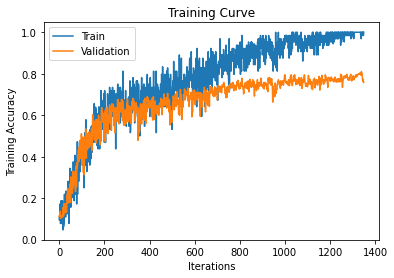

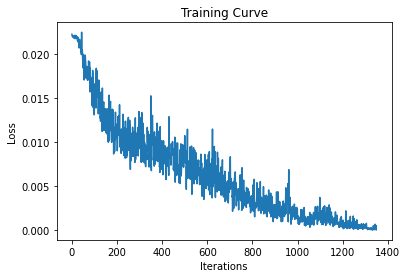

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7578947368421053


In [ ]:
model1 = GestureClassifier()
if use_cuda and torch.cuda.is_available():
  model1.cuda()
  print('CUDA is available!')

print('Training...')
train(model1, learning_rate=0.01, batch_size=100, num_epochs=50)

Hyperparameter Settings #2:

* number of convolutional layers = 2
* kernel sizes: 5x5 in the first layer, 3x3 in the second layer
* number of output channels: 7, 10

CUDA is available!
Training...


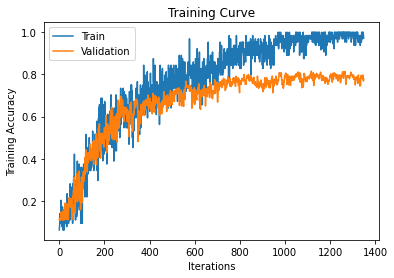

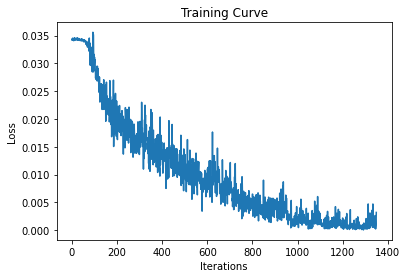

Final Training Accuracy: 0.9722222222222222
Final Validation Accuracy: 0.7789473684210526


In [ ]:
model2 = GestureClassifier()
if use_cuda and torch.cuda.is_available():
  model2.cuda()
  print('CUDA is available!')

print('Training...')
train(model2, learning_rate=0.01, batch_size=64, num_epochs=50)

*Hyperparameter Settings #3:*

* number of convolutional layers = 3
* kernel sizes: 7x7 in the first layer, 5x5 in the second layer, 3x3 in the third layer
* number of output channels: 5, 8, 10

CUDA is available!
Training...


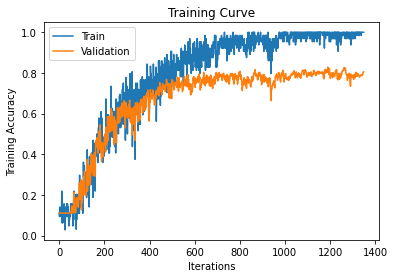

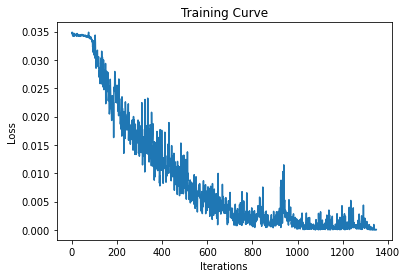

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.8052631578947368


In [ ]:
model3 = GestureClassifier()
if use_cuda and torch.cuda.is_available():
  model3.cuda()
  print('CUDA is available!')

print('Training...')
train(model3, learning_rate=0.01, batch_size=64, num_epochs=50)

*Hyperparameter Settings #4:*

* number of convolutional layers = 3
* kernel sizes: 5x5 in the first layer, 3x3 in the second layer, 3x3 in the third layer
* number of output channels: 5, 8, 12

CUDA is available!
Training...


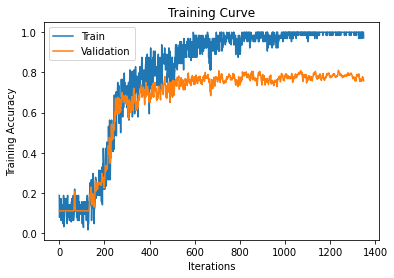

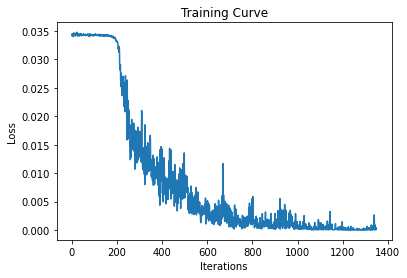

Final Training Accuracy: 0.9722222222222222
Final Validation Accuracy: 0.7578947368421053


In [ ]:
model4 = GestureClassifier()
if use_cuda and torch.cuda.is_available():
  model4.cuda()
  print('CUDA is available!')
    
print('Training...')
train(model4, learning_rate=0.01, batch_size=64, num_epochs=50)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

**ANSWER:**

Best model: model #4 with the hyperparameter settings #4

From the training accuracy curves, we see that all four of the trained models show signs of overfitting after a certain number of iterations - the validation accuracy plateaus whereas the training accuracy continues to increase. The validation accuracy also ranges between 70%-80% for all of these models. However, we see that at the point where overfitting begins to occur, the fourth model shows the smallest loss indicating that it is the most confident about its predictions. 

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

**ANSWER:**

In [ ]:
# Determine the test accuracy of the model
classification_acc = get_accuracy(model4, test_loader)

# Report the test accuracy of the model
print("Classification Accuracy:", classification_acc * 100, "%")

Classification Accuracy: 75.66137566137566 %


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

ALNC = alexnet.features

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

**ANSWER:**

In [ ]:
# Helper function that computes convolutional features of a dataset given the
# AlexNet model and a dataloader created using batch_size=1

def extract_features(model, loader, folder):
  n = 0
  classes = list(string.ascii_uppercase)
  
  # Iterate through the dataloader
  for img, label in loader:
    # Compute the feature for each image. Use the workaround described below to 
    # prevent Pytorch from keeping track of updates to the AlexNet weights.
    features = model(img)
    features_tensor = torch.from_numpy(features.detach().numpy())

    # Save the features into a folder on Google Drive
    dir = working_dir + '/AlexNet_Features/' + str(folder) + '/' + str(classes[int(label)])
    if not os.path.isdir(dir):
      os.mkdir(dir)
    torch.save(features_tensor.squeeze(0), dir+'/'+str(n)+'.tensor')
    
    n += 1
  
  # Debug message
  print("Finished computing features for", folder, "dataset.")

In [ ]:
# Helper function that loads the pre-computed features into a dataloader

def load_features(folder):
  dir = working_dir + '/AlexNet_Features/' + str(folder)
  dataset = torchvision.datasets.DatasetFolder(dir, loader=torch.load, extensions=('.tensor'))
  loader = torch.utils.data.DataLoader(dataset,
                                       batch_size=64, 
                                       num_workers=1, 
                                       shuffle=True)
  return loader

In [ ]:
# Set the batch size
N = 1

# Load the training, validation and test datasets into new dataloaders
alnc_train_loader, alnc_val_loader, alnc_test_loader = load_data(batch_size=N)

# Change the working directory
!cd

# Compute the features on each dataset
extract_features(ALNC, alnc_train_loader, 'Training')
extract_features(ALNC, alnc_val_loader, 'Validation')
extract_features(ALNC, alnc_test_loader, 'Test')

Finished computing features for Training dataset.
Finished computing features for Validation dataset.
Finished computing features for Test dataset.


### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
output = model(features)
prob = F.softmax(output)

**ANSWER:**

*Neural Network Architecture*

The neural network consists of two fully-connected layers.

<br>*Hyperparameter Choices*

The activation function used after each fully-connected layer is the ReLU - this was chosen arbitrarily, more out of habit than anything. Since there are no convolutional layers, there are no pooling layers or hyperparameters such as number of channels, kernel size, stride or padding.

The number of hidden units in the fully-connected MLP was arbitrarily chosen to be a number between N\*256\*6*6 and 9.

In [ ]:
class ALNCGestureClassifier(nn.Module):
  def __init__(self):
    super(ALNCGestureClassifier, self).__init__()
    self.fc1 = nn.Linear(N*256*6*6, 30)
    self.fc2 = nn.Linear(30, 9)
  
  def forward(self, x):
    x = x.view(-1, N*256*6*6)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
tensor = torch.from_numpy(tensor.detach().numpy())
train_classifier(model)

**ANSWER:**

In [ ]:
# This is the training function used to train a neural network given the learning
# rate, batch size, number of epochs and debug/default mode.

def alnc_train(model, learning_rate, batch_size, num_epochs):
    # Set up a random seed such that results can be reproduced
    torch.manual_seed(1000)

    # Determine the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Set up lists to hold the training loss and training/validation accuracy
    # and a count to hold the number of training iterations executed
    iters, losses, train_acc, val_acc = [], [], [], []
    count = 0
        
    tloader = train_feature_loader
    vloader = val_feature_loader

    # Train model for the specified number of epochs using batches of data
    for epoch in range(num_epochs):
        
        mini_batch = 0
        mini_batch_correct = 0
        mini_batch_total = 0

        for imgs, labels in iter(tloader):
          # Enable GPU usage
          if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

          # Training        
          out = model(imgs)             # Forward pass
          loss = criterion(out, labels) # Compute the total loss
          loss.backward()               # Backward pass (compute parameter updates)
          optimizer.step()              # Make the updates for each parameter
          optimizer.zero_grad()         # Clean up for next iteration

          # Compute accuracy of the mini-batch
          pred = out.max(1, keepdim=True)[1]
          mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
          mini_batch_total = imgs.shape[0]
          train_acc.append((mini_batch_correct / mini_batch_total))

          # Save the current training information
          iters.append(count)
          losses.append(float(loss)/batch_size)         # Compute average loss
          val_acc.append(get_accuracy(model, vloader))  # Compute validation accuracy
            
          mini_batch += 1
          count += 1

    # Checkpoint model
    model_path = working_dir + "/Model_Checkpoints/gc_bs{}_lr{}_epoch{}".format(batch_size, learning_rate, epoch)
    torch.save(model.state_dict(), model_path)

    # Plot the learning curves for accuracy and loss
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
# Enable GPU usage
use_cuda = True

# Select neural network and dataset to overfit
alnc_model = ALNCGestureClassifier()

# GPU usage debug message
if use_cuda and torch.cuda.is_available():
  alnc_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


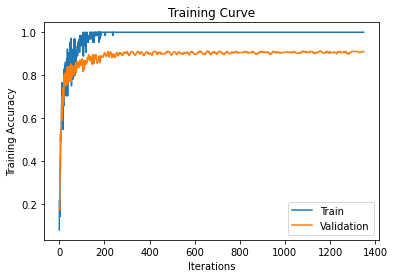

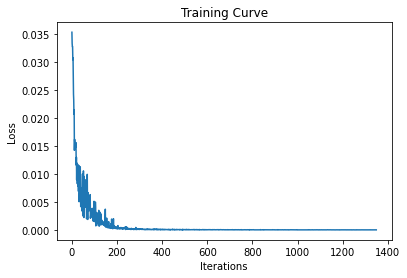

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9078947368421053


In [ ]:
# Load the pre-computed features for the training and validation datasets
train_feature_loader = load_features('Training')
val_feature_loader = load_features('Validation')

alnc_train(alnc_model, learning_rate=0.01, batch_size=64, num_epochs=50)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

**ANSWER:**

In [ ]:
# Load the pre-computed features for the test dataset
test_feature_loader = load_features('Test')

# Determine the test accuracy of the model
classification_acc = get_accuracy(alnc_model, test_feature_loader)

# Report the test accuracy of the model
print("Classification Accuracy:", classification_acc * 100, "%")

Classification Accuracy: 93.12169312169311 %


The test accuracy using the pre-computed features from AlexNet is much higher (at 93.12%) than the test accuracy achieved in Part 3(d) i.e. 75.66%.

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

**ANSWER:**

In [ ]:
# Compute the features using alexnet.features on the debug dataset, which
# contains the images that I had collected for Lab 3 Part(a)
alnc_debug_data_loader = load_data(batch_size=N,
                                   root=working_dir+'/Submission_Data/',
                                   debug=True)
extract_features(ALNC, alnc_debug_data_loader, 'Debug')

# Load the pre-computed features for the debug dataset
debug_feature_loader = load_features('Debug')

# Determine the test accuracy of the model
classification_acc = get_accuracy(alnc_model, debug_feature_loader)

# Report the test accuracy of the model
print("Classification Accuracy:", classification_acc * 100, "%")

Finished computing features for Debug dataset.
Classification Accuracy: 100.0 %


The accuracy obtained on these sample images is 100%, which is higher than the accuracy obtained in Part 4(d) i.e. 93.12%.

The model was able to predict the correct label for every single one of the images in this dataset. However, this may not be the most accurate representation of the model's ability to classify different hand gestures for a number of reasons:
* The `debug_dataset` used above is not an good representation of never-seen-before data This is because the 27 images that were submitted by me for Lab 3 Part A were already included in the original test dataset.
* The size of `debug_dataset` is very small. It is possible that all of these images were coincidentally easier to predict, which would explain the high classification accuracy.